In [1]:
from tensorflow import keras
import tensorflow as tf
import os
from lib.utils import model, gan, preprocess, build
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import gdown
from zipfile import ZipFile

In [2]:
res = 128
channel = 3
batch_size = 4
img_shape=(res,res,channel)
latent_dim = 128
epochs = 1500
s = tf.random.normal([16, latent_dim])
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

2022-03-17 22:59:20.566439: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 22:59:20.571451: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 22:59:20.571801: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 22:59:20.617086: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
datagen = ImageDataGenerator(rescale=1./255,
                             #vertical_flip=True,
                             horizontal_flip=True,
                             width_shift_range=0.3,
                             height_shift_range=0.3,
                             shear_range=0.3,
                             rotation_range=20,
                             fill_mode='nearest'

                             )
train_dir = '/home/sandor/Dev/final/finalproject/gan/datasets/port'

dataset = datagen.flow_from_directory(
     train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode=None

)
# dataset = keras.preprocessing.image_dataset_from_directory(
#    train_dir,
#     label_mode=None,
#     image_size=(128, 128),
#     batch_size=batch_size,
#     smart_resize=True)

Found 462 images belonging to 1 classes.


In [4]:
# dataset = dataset.map(lambda x: x /127.5 - 1.0)


In [5]:
gen1, disc1 = build.buildModel('model_1', d=8,df=6, f=7, ncl=4, k=5,s=2, isAsc=False, isBatch=True, o=3, dataf=dataframe, l = latent_dim, shape=img_shape)
d_optimizer = build.d_optimizer(0.0002)
g_optimizer = build.g_optimizer(0.0002)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense (Dense)               (None, 8192)              1056768   
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      409728    
 nspose)                                                         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 128)       0         
                                                         

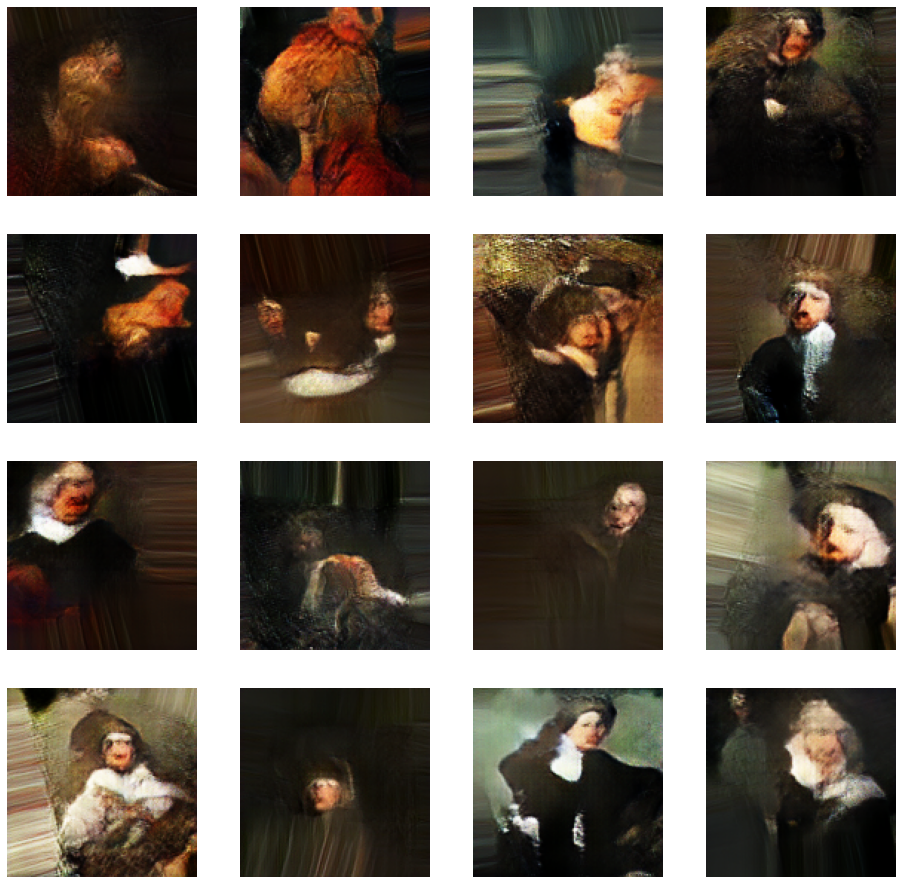

True
115/115 [==============================] - 9s 78ms/step - d_loss: 0.7413 - g_loss: 0.8719
Epoch 17/1500
 35/115 [========>.....................] - ETA: 6s - d_loss: 0.7294 - g_loss: 0.7775

KeyboardInterrupt: 

In [6]:
checkpoint_dir = '../../checkpoints/port_checkpoints/7/'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=g_optimizer,
                                 discriminator_optimizer=d_optimizer,
                                 generator=gen1,
                                 discriminator=disc1)
ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=5)
if ckpt_manager.latest_checkpoint:
    checkpoint.restore(ckpt_manager.latest_checkpoint).expect_partial()
    print('Latest checkpoint restored!!')
g = gan.GAN(g=gen1, d=disc1, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset,steps_per_epoch=115, epochs=epochs, callbacks=[
    gan.GANCallback(num_img=16, seed=s, isSaving=True,loc="../../oDig/port/8/image_at_epoch_{:04d}.png", checkpoint=checkpoint,
                    prefix=checkpoint_prefix)])

In [ ]:
import imageio
import glob

anim_file = 'port.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob(f'oDig/port/8/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)
import tensorflow_docs.vis.embed as embed

embed.embed_file(anim_file)